# PCA 2 (Core) / Elida Peña

**Visualización de Datos con Componentes Principales**

**Descripción:**

En esta actividad, utilizarás el Análisis de Componentes Principales (PCA) para visualizar datos en un espacio de menor dimensionalidad. Trabajarás con el famoso dataset «Iris» para reducir sus características a dos componentes principales y visualizar cómo se distribuyen las diferentes clases en este nuevo espacio de características.

Enlace al dataset: https://www.kaggle.com/uciml/iris



**Objetivo:**

El objetivo es reducir la dimensionalidad del dataset «Iris» mediante PCA, visualizando las clases en el nuevo espacio bidimensional y evaluando si los componentes principales son capaces de capturar adecuadamente la variabilidad de los datos.



**Instrucciones:**

**1. Carga de datos:**
  – Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
  – Asegúrate de que los datos no contengan valores nulos o atípicos.

**2. Exploración y preprocesamiento de datos:**
  – Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
  – Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

**3. Aplicación de PCA:**
  – Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
  – Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

**4. Visualización de los componentes principales:**
  – Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
  – Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

**5. Interpretación de los resultados:**
  – Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.
  – Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.

**Análisis de Resultados:**

  – Compara la distribución de las clases en el espacio bidimensional con la distribución original de las variables. ¿Qué tan bien puede PCA capturar las relaciones entre las clases en este caso?
  – Realiza un reporte que incluya el gráfico de los componentes principales y discute la utilidad de PCA para la visualización de datos en problemas de clasificación.

**Conclusión:**

  – Esta actividad se centra en la visualización de datos utilizando PCA. La reducción de dimensionalidad mediante PCA no solo ayuda a visualizar los datos en un espacio más pequeño, sino que también permite identificar las relaciones entre las variables y las clases.

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#Cargar el dataset y revisar su estructura básica.
# Cargar el dataset
path = "../data/Iris.csv"
df_iris  = pd.read_csv(path, sep=',')

# Revisar la estructura básica del dataset
print("Primeras 5 filas del dataset:")
print(df_iris.head())

print("\nDescripción estadística básica:")
print(c.describe())  # Estadísticas básicas del dataset.

Primeras 5 filas del dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Descripción estadística básica:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000  

In [3]:
print("\nInformación del dataset:")
print(df_iris.info()) 


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [4]:
print(df_iris.isnull().sum())  # Muestra la cantidad de nulos por columna

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


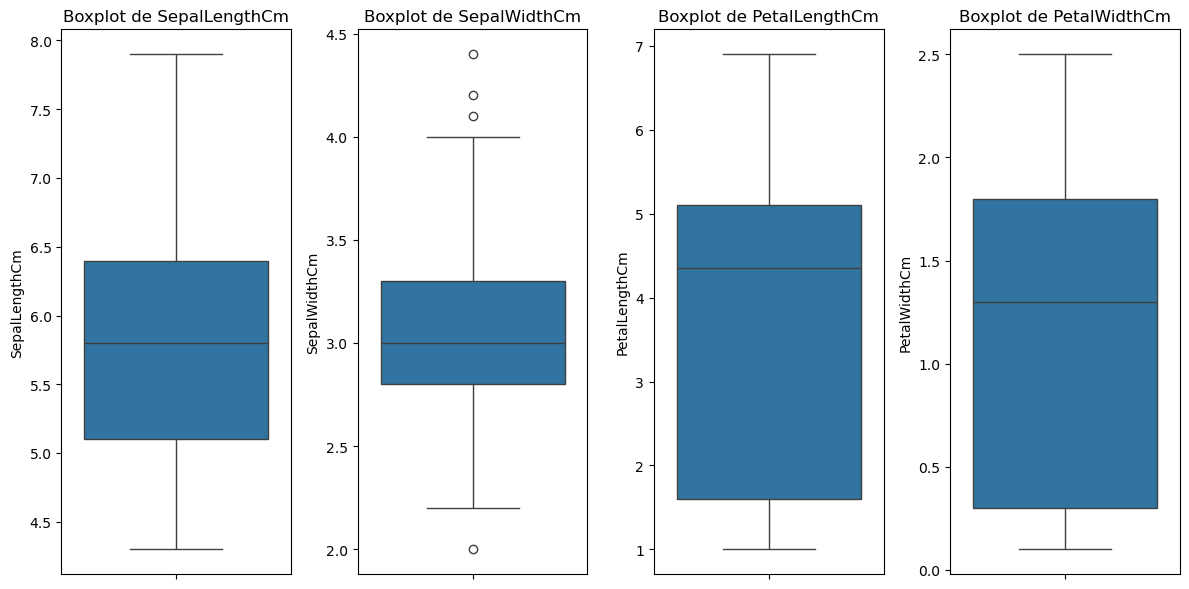

In [5]:
# Detección de valores atípicos usando diagramas de caja (Boxplots)
import matplotlib.pyplot as plt
import seaborn as sns

# Dibujar boxplots para identificar valores atípicos
plt.figure(figsize=(12, 6))
for i, column in enumerate(df_iris.columns[1:5]):  # Excluir 'Id' y 'Species'
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df_iris[column])
    plt.title(f"Boxplot de {column}")
plt.tight_layout()
plt.show()

Límites: 2.05 - 4.05
Datos antes: 150 filas
Datos después: 146 filas

Boxplot de SepalWidthCm sin valores atípicos:


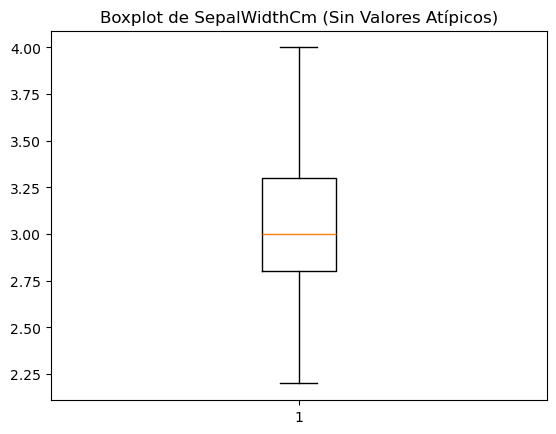

In [6]:
# Calcular el IQR para SepalWidthCm
Q1 = df_iris['SepalWidthCm'].quantile(0.25)  # Primer cuartil (25%)
Q3 = df_iris['SepalWidthCm'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Límites: {lower_bound:.2f} - {upper_bound:.2f}")

# Filtrar el DataFrame eliminando valores atípicos
df_iris_cleaned = df_iris[(df_iris['SepalWidthCm'] >= lower_bound) & 
                          (df_iris['SepalWidthCm'] <= upper_bound)]

# Mostrar resultados
print(f"Datos antes: {df_iris.shape[0]} filas")
print(f"Datos después: {df_iris_cleaned.shape[0]} filas")
print("\nBoxplot de SepalWidthCm sin valores atípicos:")
plt.boxplot(df_iris_cleaned['SepalWidthCm'])
plt.title("Boxplot de SepalWidthCm (Sin Valores Atípicos)")
plt.show()


Primeras 5 filas de los datos normalizados:
         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0 -1.720542      -0.900681      1.032057      -1.341272     -1.312977
1 -1.697448      -1.143017     -0.124958      -1.341272     -1.312977
2 -1.674353      -1.385353      0.337848      -1.398138     -1.312977
3 -1.651258      -1.506521      0.106445      -1.284407     -1.312977
4 -1.628164      -1.021849      1.263460      -1.341272     -1.312977


<Figure size 1200x800 with 0 Axes>

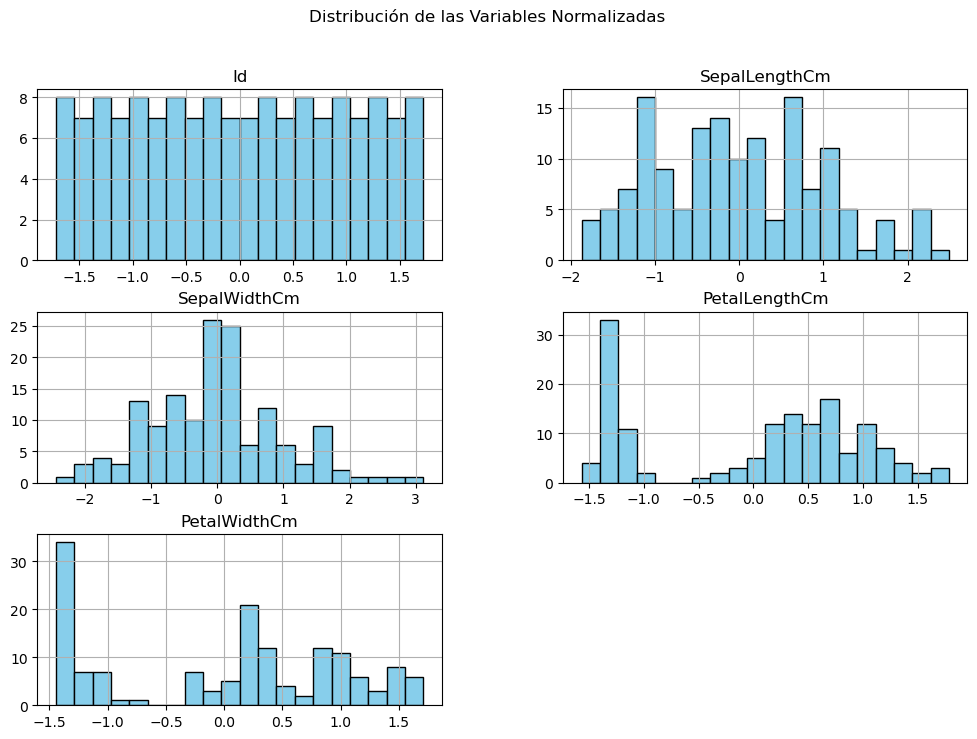

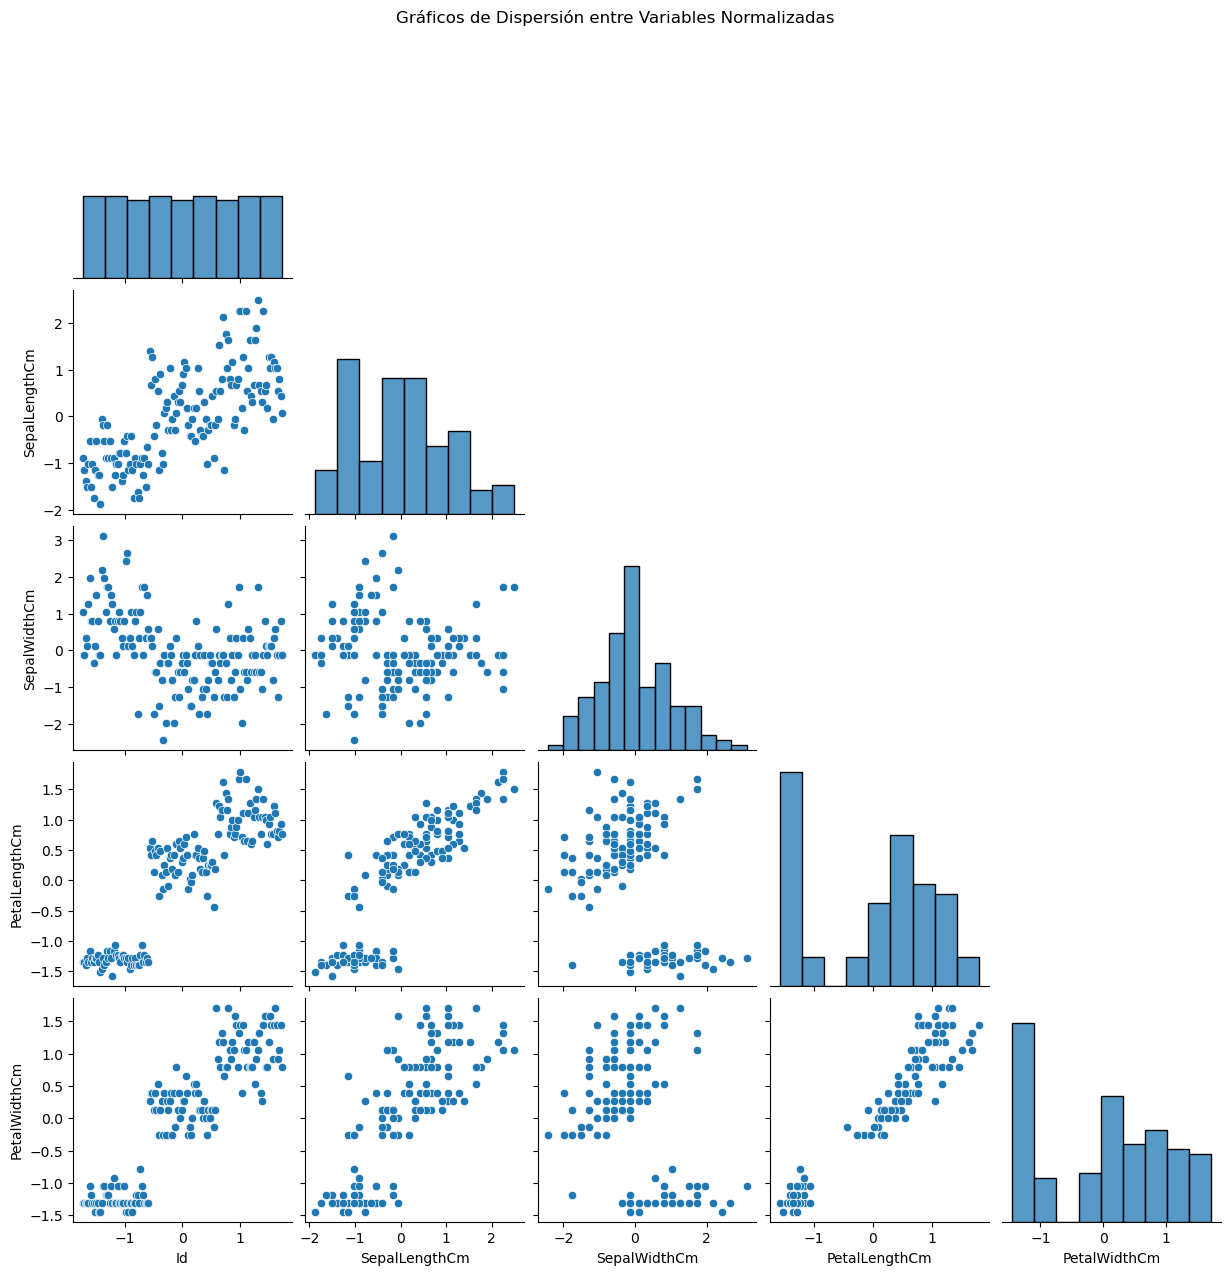

In [7]:
# 1. Seleccionar las variables numéricas (excluyendo la columna 'Species')
features = df_iris.drop(columns=['Species'])

# 2. Normalizar los datos
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Convertir a DataFrame
df_normalized = pd.DataFrame(features_normalized, columns=features.columns)

# Mostrar las primeras filas de los datos normalizados
print("Primeras 5 filas de los datos normalizados:")
print(df_normalized.head())

# 3. Visualización de la distribución inicial de las variables mediante histogramas
plt.figure(figsize=(12, 8))
df_normalized.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de las Variables Normalizadas")
plt.show()

# 4. Visualización con gráficos de dispersión
sns.pairplot(df_normalized, corner=True, diag_kind='hist')
plt.suptitle("Gráficos de Dispersión entre Variables Normalizadas", y=1.02)
plt.show()

Varianza explicada por el Componente Principal 1: 0.75
Varianza explicada por el Componente Principal 2: 0.18
Varianza total explicada (dos componentes): 0.93


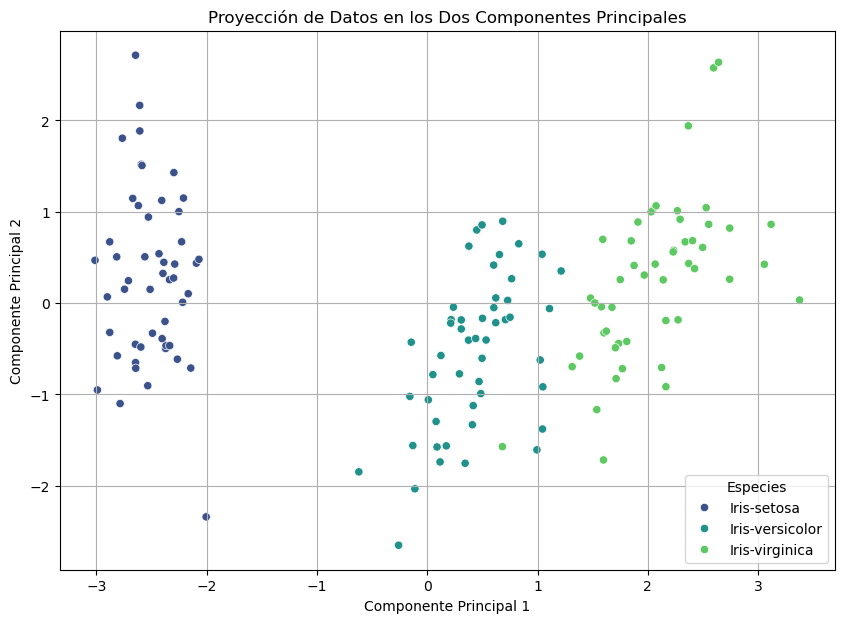

In [8]:
# 1. Aplicar PCA con dos componentes principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_normalized)

# 2. Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(pca_result, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['Species'] = df_iris['Species']  # Añadir etiquetas de clase

# 3. Calcular la varianza explicada
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

print(f"Varianza explicada por el Componente Principal 1: {explained_variance[0]:.2f}")
print(f"Varianza explicada por el Componente Principal 2: {explained_variance[1]:.2f}")
print(f"Varianza total explicada (dos componentes): {total_explained_variance:.2f}")

# 4. Visualización de los datos proyectados en los dos componentes principales
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Componente Principal 1',
    y='Componente Principal 2',
    hue='Species',
    palette='viridis',
    data=df_pca
)
plt.title("Proyección de Datos en los Dos Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Especies")
plt.grid()
plt.show()


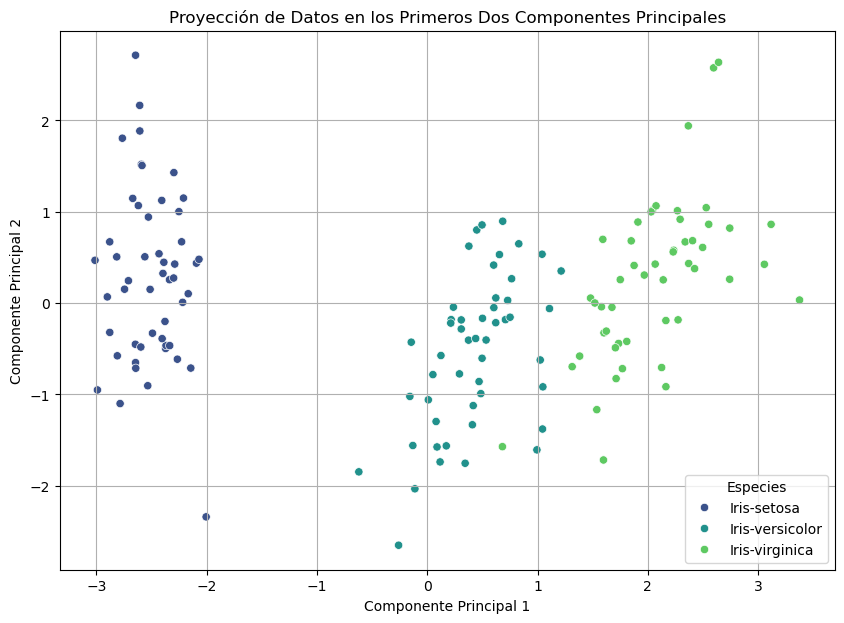

In [9]:
# 1. Cargar y preparar los datos (si no lo has hecho aún)
features = df_iris.drop(columns=['Species'])  # Variables independientes
species = df_iris['Species']  # Etiquetas de clase

# Normalizar los datos
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# 2. Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_normalized)

# Crear un DataFrame con los resultados del PCA
df_pca = pd.DataFrame(pca_result, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['Species'] = species

# 3. Visualización de los datos proyectados
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Componente Principal 1',
    y='Componente Principal 2',
    hue='Species',
    palette='viridis',  # Diferentes colores para cada clase
    data=df_pca
)
plt.title("Proyección de Datos en los Primeros Dos Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Especies")
plt.grid(True)
plt.show()

Cargas de los Componentes Principales:
               Componente Principal 1  Componente Principal 2
Id                           0.481360               -0.022752
SepalLengthCm                0.448450                0.382858
SepalWidthCm                -0.231950                0.920078
PetalLengthCm                0.510792                0.030749
PetalWidthCm                 0.502470                0.073568


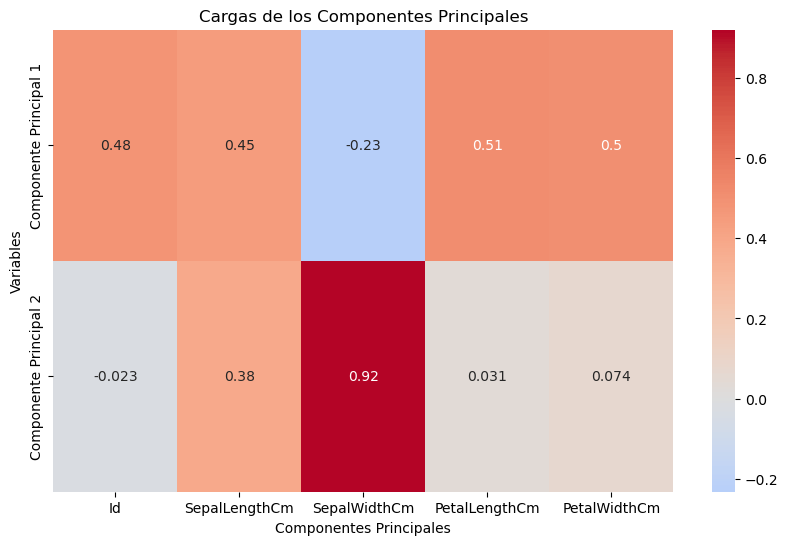

In [10]:
# Coeficientes de los componentes principales
pca_components = pd.DataFrame(pca.components_, columns=features.columns, 
                              index=['Componente Principal 1', 'Componente Principal 2'])

# Mostrar los coeficientes
print("Cargas de los Componentes Principales:")
print(pca_components.T)

# Visualización de la influencia de las variables en cada componente
plt.figure(figsize=(10, 6))
sns.heatmap(pca_components, annot=True, cmap='coolwarm', center=0)
plt.title("Cargas de los Componentes Principales")
plt.xlabel("Componentes Principales")
plt.ylabel("Variables")
plt.show()


Conclusión:

PCA redujo con éxito las dimensiones del dataset Iris de 4 a 2, manteniendo la mayor parte de la información (varianza) y facilitando la visualización.
Las características PetalLengthCm y PetalWidthCm son las más influyentes en la separación de las clases, seguidas por SepalWidthCm en el segundo componente.
La reducción de dimensionalidad con PCA permite entender mejor los datos y ayuda en tareas de clasificación al enfocarse en las variables más relevantes.